https://www.statsmodels.org/stable/examples/notebooks/generated/kernel_density.html

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs



In [4]:
np.random.seed(42) 

In [5]:
# Location, scale and weight for the two distributions
dist1_loc, dist1_scale, weight1 = -1 , .5, .25
dist2_loc, dist2_scale, weight2 = 1 , .5, .75

# Sample from a mixture of distributions
obs_dist = mixture_rvs(prob=[weight1, weight2], size=250,
                        dist=[stats.norm, stats.norm],
                        kwargs = (dict(loc=dist1_loc, scale=dist1_scale),
                                  dict(loc=dist2_loc, scale=dist2_scale)))

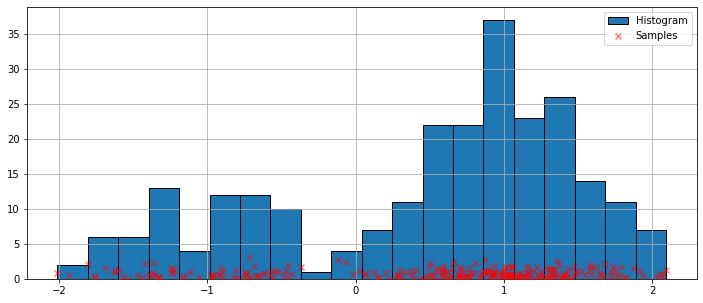

In [6]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Scatter plot of data samples and histogram
ax.scatter(obs_dist, np.abs(np.random.randn(obs_dist.size)),
            zorder=15, color='red', marker='x', alpha=0.5, label='Samples')
lines = ax.hist(obs_dist, bins=20, edgecolor='k', label='Histogram')

ax.legend(loc='best')
ax.grid(True, zorder=-5)

In [7]:
kde = sm.nonparametric.KDEUnivariate(obs_dist)
kde.fit() # Estimate the densities



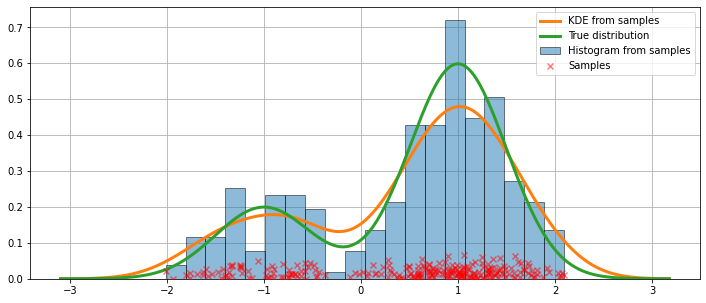

In [8]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Plot the histrogram
ax.hist(obs_dist, bins=20, density=True, label='Histogram from samples',
        zorder=5, edgecolor='k', alpha=0.5)

# Plot the KDE as fitted using the default arguments
ax.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)

# Plot the true distribution
true_values = (stats.norm.pdf(loc=dist1_loc, scale=dist1_scale, x=kde.support)*weight1
              + stats.norm.pdf(loc=dist2_loc, scale=dist2_scale, x=kde.support)*weight2)
ax.plot(kde.support, true_values, lw=3, label='True distribution', zorder=15)

# Plot the samples
ax.scatter(obs_dist, np.abs(np.random.randn(obs_dist.size))/40,
           marker='x', color='red', zorder=20, label='Samples', alpha=0.5)

ax.legend(loc='best')
ax.grid(True, zorder=-5)

### Varying the bandwidth

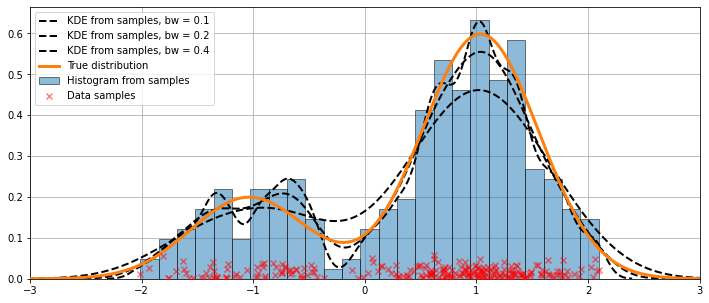

In [9]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Plot the histrogram
ax.hist(obs_dist, bins=25, label='Histogram from samples',
        zorder=5, edgecolor='k', density=True, alpha=0.5)

# Plot the KDE for various bandwidths
for bandwidth in [0.1, 0.2, 0.4]:
    kde.fit(bw=bandwidth) # Estimate the densities
    ax.plot(kde.support, kde.density, '--', lw=2, color='k', zorder=10,
            label='KDE from samples, bw = {}'.format(round(bandwidth, 2)))

# Plot the true distribution
ax.plot(kde.support, true_values, lw=3, label='True distribution', zorder=15)

# Plot the samples
ax.scatter(obs_dist, np.abs(np.random.randn(obs_dist.size))/50,
           marker='x', color='red', zorder=20, label='Data samples', alpha=0.5)

ax.legend(loc='best')
ax.set_xlim([-3, 3])
ax.grid(True, zorder=-5)

### Using different kernel functions

In [10]:
from statsmodels.nonparametric.kde import kernel_switch
list(kernel_switch.keys())

['gau', 'epa', 'uni', 'tri', 'biw', 'triw', 'cos', 'cos2']

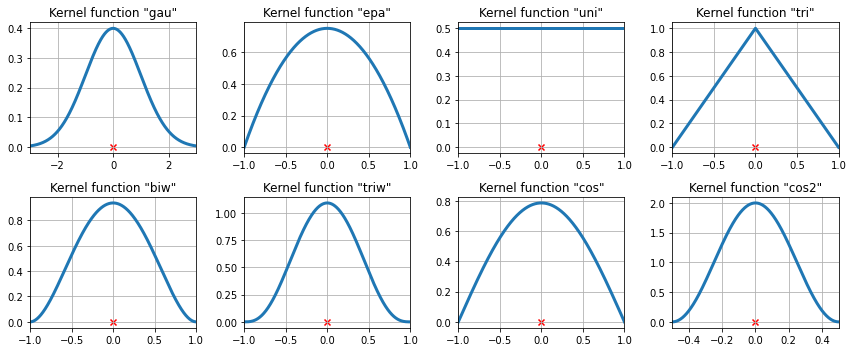

In [11]:
# Create a figure
fig = plt.figure(figsize=(12, 5))

# Enumerate every option for the kernel
for i, (ker_name, ker_class) in enumerate(kernel_switch.items()):

    # Initialize the kernel object
    kernel = ker_class()

    # Sample from the domain
    domain = kernel.domain or [-3, 3]
    x_vals = np.linspace(*domain, num=2**10)
    y_vals = kernel(x_vals)

    # Create a subplot, set the title
    ax = fig.add_subplot(2, 4, i + 1)
    ax.set_title('Kernel function "{}"'.format(ker_name))
    ax.plot(x_vals, y_vals, lw=3, label='{}'.format(ker_name))
    ax.scatter([0], [0], marker='x', color='red')
    plt.grid(True, zorder=-5)
    ax.set_xlim(domain)

plt.tight_layout()

